In [196]:
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
yf.pdr_override()
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import plotly.graph_objects as go

In [121]:
dirty = pd.read_csv("users_kmeans.csv")
dirty
x = []
y = []
labels = []
for i in range(0, len(dirty.columns), 2):
    x.extend(dirty.iloc[:,i].dropna().values)
    y.extend(dirty.iloc[:,i+1].dropna().values)
    labels.extend([i//2 for _ in range(len(dirty.iloc[:,i].dropna().values))])
x = np.array(x)
y = np.array(y)
labels = np.array(labels)

X = np.array([[i, j] for i,j in zip(x,y)])
X

array([[-0.33824729, -0.31097575],
       [ 0.19958   ,  0.43395185],
       [ 1.5833037 , -1.16524934],
       ...,
       [-2.81309049, -0.60312397],
       [-2.88048197, -0.6916436 ],
       [-1.55465144, -1.07478861]])

In [133]:
x.reshape(-1,1).shape

(593, 1)

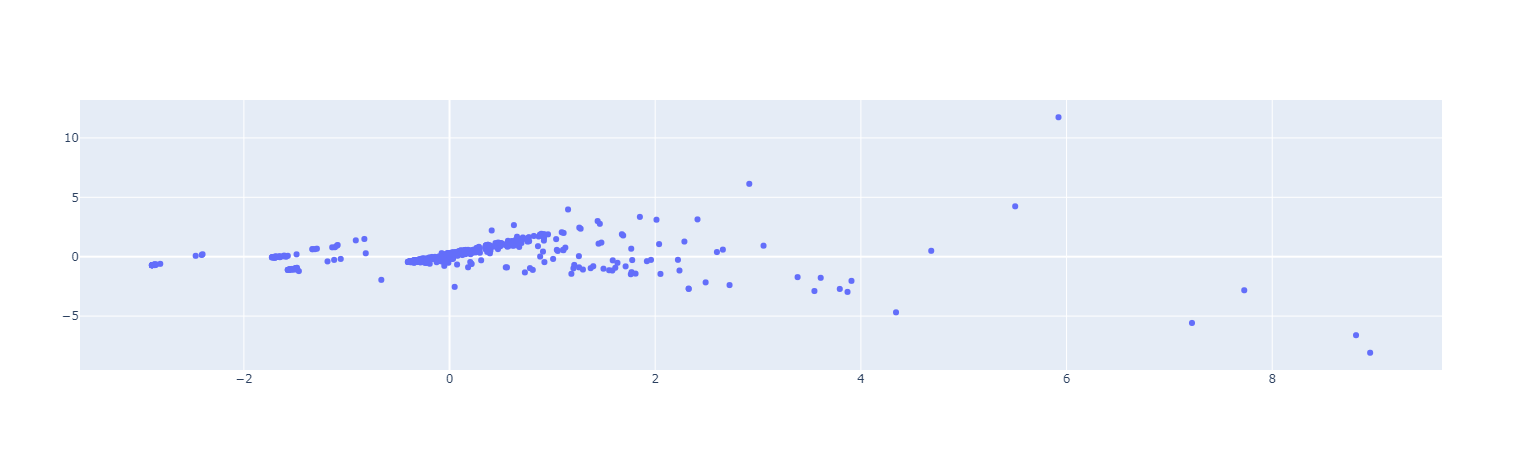

In [105]:
fig = go.Figure(go.Scatter(x=x, y=y, mode="markers"))
fig.show()

In [123]:
kmeans = KMeans(n_clusters=4, random_state=0).fit_predict(X)
kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
def SetColor(x):
    if x == 0:
        return "blue"
    if x == 1:
        return "red"
    if x == 2:
        return "green"
    if x == 3:
        return "yellow"

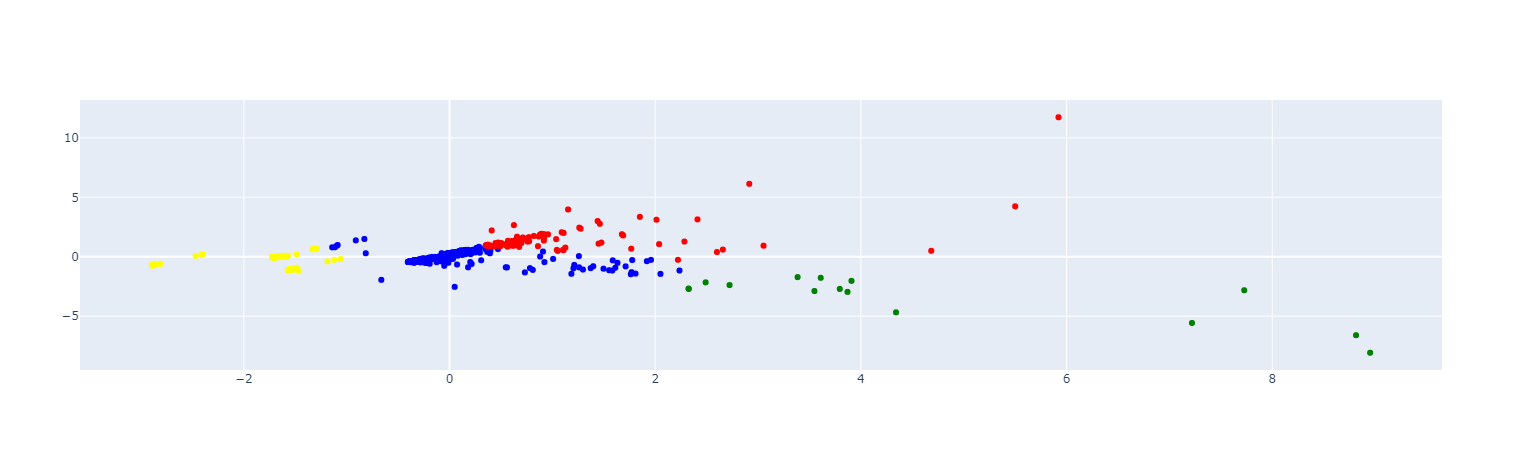

In [114]:
fig = go.Figure(data=go.Scatter(x=x, y=y, mode='markers', marker = dict(color=list(map(SetColor, kmeans)))))
fig.show()

In [198]:
# KNN
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :3]
y = iris.target
# iris
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [212]:
knn = KNeighborsClassifier(n_neighbors=10, weights="distance").fit(X_train,y_train)

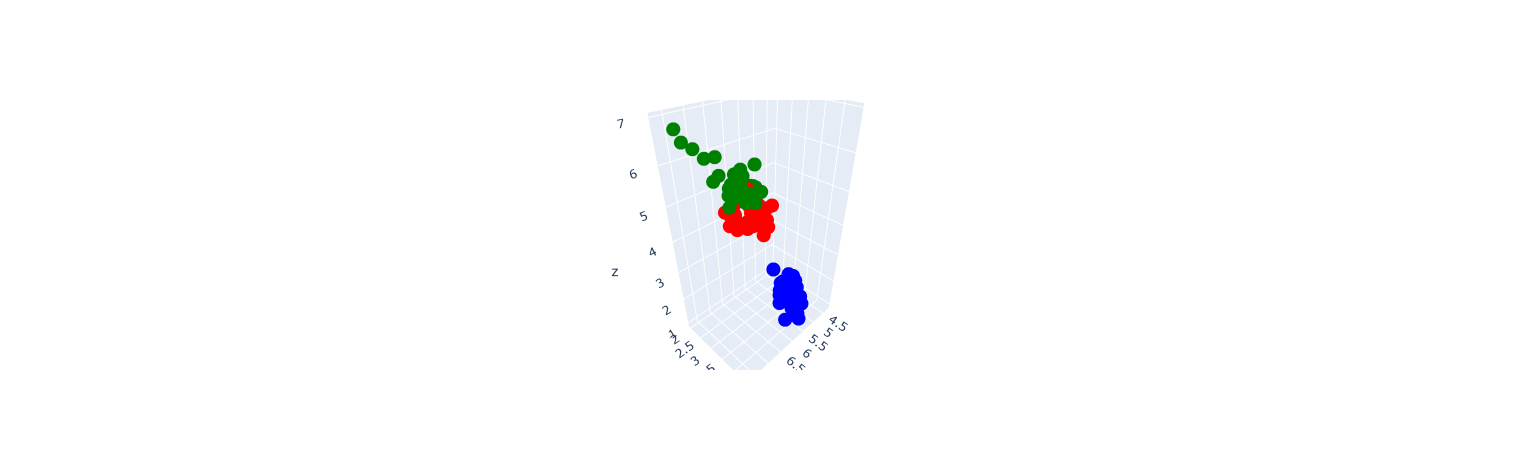

In [213]:
fig = go.Figure(go.Scatter3d(x=X_train[:,0], y=X_train[:,1], z=X_train[:,2], mode="markers", marker = dict(color=list(map(SetColor, y_train))) ))
fig.show()

In [214]:
def SetColor2(x):
    if x == 0:
        return "#1f77b4"
    if x == 1:
        return "#ff7f0e"
    if x == 2:
        return "#bcbd22"

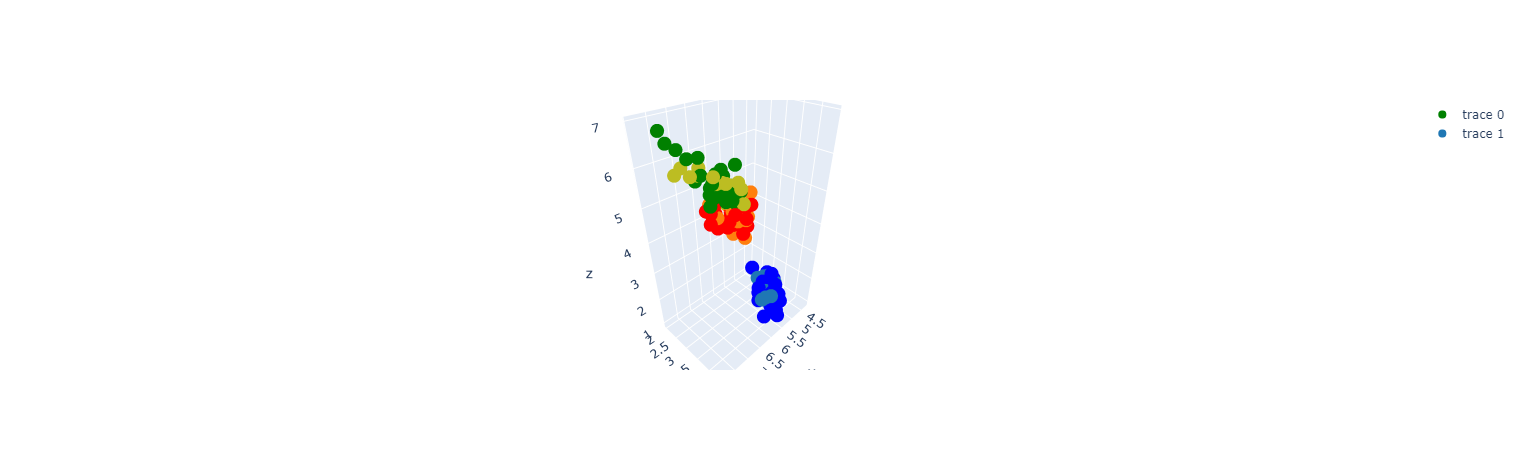

In [215]:
fig = go.Figure(data=[go.Scatter3d(x=X_train[:,0], y=X_train[:,1], z=X_train[:,2], mode="markers", marker = dict(color=list(map(SetColor, y_train))) ),
                      go.Scatter3d(x=X_test[:,0], y=X_test[:,1], z=X_test[:,2], mode="markers", marker = dict(color=list(map(SetColor2, knn.predict(X_test)))) )])
fig.show()